In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Creating an Excel File for output..
writer=pd.ExcelWriter('Regression_Output.xlsx', engine='xlsxwriter')

In [3]:
gc.enable()

In [4]:
credit_spend=  pd.read_excel('Data Set.xlsx',encoding= 'cp1252')
credit_spend.head(3)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0


In [5]:
credit_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


# Finding Categorical and Numerical Variables in a Dataset

In [6]:
# Categorical List= Contains categorical variables..
cat_var=['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat',
         'default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown','cartype',
         'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool',
         'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
         'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
         'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
         'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
         'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
         'response_03']

In [7]:
numerical_var= [var for var in credit_spend.columns if var not in cat_var]
numerical_var

['custid',
 'age',
 'ed',
 'income',
 'lninc',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'spoused',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'carvalue',
 'commutetime',
 'cardspent',
 'card2spent',
 'tenure',
 'longmon',
 'lnlongmon',
 'longten',
 'lnlongten',
 'tollmon',
 'lntollmon',
 'tollten',
 'lntollten',
 'equipmon',
 'lnequipmon',
 'equipten',
 'lnequipten',
 'cardmon',
 'lncardmon',
 'cardten',
 'lncardten',
 'wiremon',
 'lnwiremon',
 'wireten',
 'lnwireten',
 'hourstv']

In [8]:
credit_spend.drop('custid',axis=1,inplace= True)
gc.collect()

10130

In [9]:
credit_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 129 entries, region to response_03
dtypes: float64(31), int64(97), object(1)
memory usage: 4.9+ MB


In [10]:
credit_spend['total_spent']= credit_spend['cardspent']+credit_spend['card2spent']
credit_spend.head(2)

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent
0,1,2.0,1,20,2,September,15,3,1,1,...,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,22,2,May,17,4,2,0,...,1,1,1,1,1,1,0,0,0,77.54


In [11]:
credit_spend.drop(['cardspent','card2spent'],axis=1,inplace= True)
gc.collect()

20

In [12]:
misc=credit_spend.isnull().sum()
total=5000.00
for i in misc.index:
    t=misc[i]/total
    t=t*100
    if t>= 25.00:
        credit_spend.drop(i,axis=1,inplace=True)
gc.collect()
misc

region         0
townsize       2
gender         0
age            0
agecat         0
              ..
news           0
response_01    0
response_02    0
response_03    0
total_spent    0
Length: 128, dtype: int64

In [13]:
credit_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 120 entries, region to total_spent
dtypes: float64(22), int64(97), object(1)
memory usage: 4.6+ MB


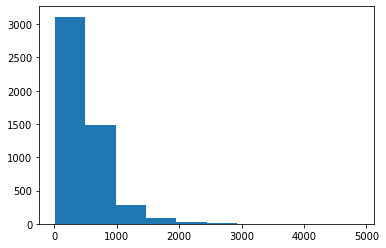

In [14]:
plt.hist(credit_spend['total_spent'],bins=10)
plt.show()

In [15]:
credit_spend['total_spent_ln']= np.log(credit_spend['total_spent'])
credit_spend.head(1)

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent,total_spent_ln
0,1,2.0,1,20,2,September,15,3,1,1,...,0,1,1,0,0,0,1,0,149.46,5.007029


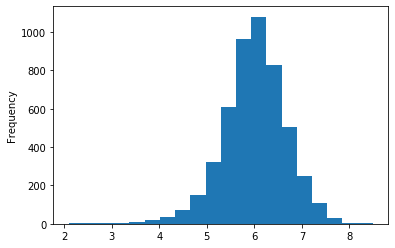

In [16]:
credit_spend['total_spent_ln'].plot.hist(bins=20)

In [17]:
credit_spend_1= credit_spend.drop('total_spent',axis=1,inplace=True)
gc.collect()

3010

In [18]:
credit_spend.head(1)

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent_ln
0,1,2.0,1,20,2,September,15,3,1,1,...,0,0,1,1,0,0,0,1,0,5.007029


# Dropping variables

In [19]:
credit_spend.drop(['addresscat','agecat','cardtenure','commutecat','edcat','equipmon',
            'longten', 'spoused','spousedcat'], axis=1, inplace= True)
gc.collect()

40

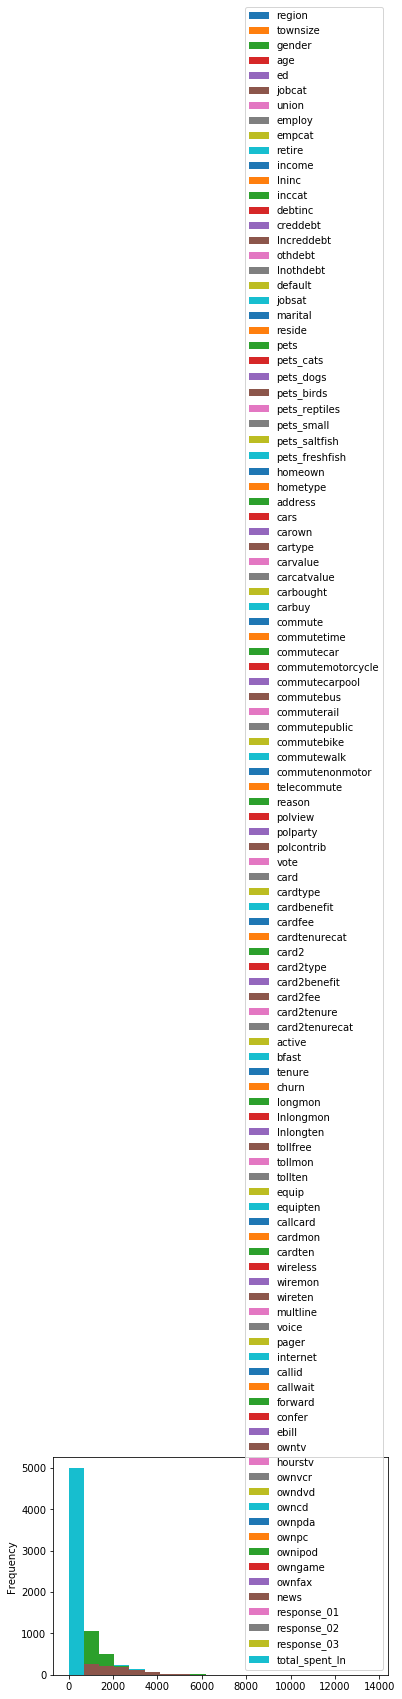

In [20]:
credit_spend.plot.hist(bins=20)

# Outlier Treatment and Missing Value Treatment

In [21]:
for col in credit_spend:
    #get dtype for column
    dt = credit_spend[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        credit_spend[col].fillna(credit_spend[col].mean(),inplace=True)
credit_spend.to_excel(writer,'Missing Value Treatment',index=True)

In [22]:
for col in credit_spend:
    #get dtype for column
    dt = credit_spend[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        credit_spend[col]=credit_spend[col].clip_upper(credit_spend[col].quantile(0.99))
        credit_spend[col]=credit_spend[col].clip_lower(credit_spend[col].quantile(0.01))
credit_spend.to_excel(writer,'Outlier_Treatment',index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  import sys


In [23]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

###########################
## IMPORT REQUIRED PACKAGES
###########################
import xgboost
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.decomposition import FactorAnalysis, PCA
from statsmodels.formula.api import ols

In [24]:
numerical_var= [var for var in credit_spend.columns if var not in cat_var]
numerical_var

['age',
 'ed',
 'income',
 'lninc',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'carvalue',
 'commutetime',
 'tenure',
 'longmon',
 'lnlongmon',
 'lnlongten',
 'tollmon',
 'tollten',
 'equipten',
 'cardmon',
 'cardten',
 'wiremon',
 'wireten',
 'hourstv',
 'total_spent_ln']

In [25]:
numerical_credit= credit_spend[numerical_var]
factor=FactorAnalysis(10).fit(numerical_credit)
F_analysis=pd.DataFrame(factor.components_,columns=numerical_var).T
F_analysis=F_analysis.add_prefix('Factor')
F_analysis.to_excel(writer,'Factor Analysis',index=True)
F_analysis.head()

,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9
age,4.984677,5.384562,4.072431,0.268718,2.377126,-5.637375,6.580380,-12.779553,-0.127229,0.214608
ed,0.650223,-1.151576,0.027326,-0.006633,0.476752,0.370112,-0.024083,0.128259,-0.261006,0.253692
income,16.479144,3.879648,-2.768039,-0.423184,52.418985,4.376834,-0.340570,0.223242,1.828606,-0.015598
lninc,0.206855,0.029655,-0.040733,0.009476,0.570461,0.056431,-0.004395,0.016690,-0.409800,0.003483
debtinc,0.081828,0.009955,0.078582,-0.010349,0.116430,-0.007059,5.631959,2.646079,0.094097,0.001135


In [26]:
credit_spend.drop(['income','creddebt','othdebt'],axis=1, inplace= True)
#Droping these variables because log of these varibales are already present in the data.

In [27]:
pca= PCA().fit(numerical_credit)
print ("Explained variance by component: %s" % pca.explained_variance_ratio_)
print("pd.DataFrame[pca.components_,columns=numerical_var]")

Explained variance by component: [5.43307959e-01 2.27751947e-01 1.48707885e-01 7.89600798e-02
 9.47270948e-04 1.19097366e-04 5.34078549e-05 4.71887285e-05
 2.50265460e-05 1.72068666e-05 1.44314660e-05 1.10595160e-05
 1.02049408e-05 8.25541110e-06 6.35069517e-06 5.93435943e-06
 2.52648406e-06 1.36310333e-06 7.65581096e-07 5.24189235e-07
 4.93517969e-07 2.13983247e-07 1.87836281e-07 1.23632641e-07
 1.06807301e-07 1.03746623e-07 8.62048050e-08 7.17082976e-08
 6.58735076e-08 3.64504050e-08 1.66183390e-08 8.87302017e-09
 3.36001493e-33]
pd.DataFrame[pca.components_,columns=numerical_var]


In [28]:
corr=pd.DataFrame(credit_spend.corr())
corr_spent=pd.DataFrame(corr['total_spent_ln'])
corr_spent.to_excel(writer,'Correlation_ln',index=True)
corr_spent.head()

,total_spent_ln
region,0.039216
townsize,0.006178
gender,-0.078605
age,0.007270
ed,0.098565


In [29]:
import researchpy as rp
rp.summary_cont(numerical_credit)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,5000.0,47.025600,17.770338,0.251311,46.532921,47.518279
1,ed,5000.0,14.543000,3.281083,0.046402,14.452033,14.633967
2,income,5000.0,54.759600,55.377511,0.783156,53.224270,56.294930
3,lninc,5000.0,3.697049,0.738495,0.010444,3.676575,3.717524
4,debtinc,5000.0,9.914120,6.241691,0.088271,9.741070,10.087170
5,creddebt,5000.0,1.758369,2.380681,0.033668,1.692365,1.824373
6,lncreddebt,5000.0,-0.127780,1.241272,0.017554,-0.162194,-0.093366
7,othdebt,5000.0,3.522506,4.221760,0.059705,3.405459,3.639554
8,lnothdebt,5000.0,0.698385,1.104418,0.015619,0.667765,0.729005
9,reside,5000.0,2.204000,1.393977,0.019714,2.165352,2.242648


In [30]:
import pandas_profiling

In [31]:
credit_spend.drop('bfast',axis=1,inplace=True)
gc.collect()

20

In [32]:
credit_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 107 entries, region to total_spent_ln
dtypes: float64(18), int64(88), object(1)
memory usage: 4.1+ MB


In [33]:
credit_spend.drop(['wireten','wiremon','tollten','pets_small','pets_dogs','pets_birds','pets_small','pets_saltfish','pets_reptiles','pets_freshfish','pets','internet','hourstv','equipten','cardtenurecat','card2tenurecat','pets_cats','tollmon','birthmonth'], axis=1,inplace=True)
gc.collect()

0

In [34]:
credit_spend['address'].fillna(credit_spend['address'].mean(),inplace= True)
credit_spend.drop(['longmon'],axis=1, inplace= True)
gc.collect()

20

In [35]:
credit_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 88 columns):
region               5000 non-null int64
townsize             5000 non-null float64
gender               5000 non-null int64
age                  5000 non-null int64
ed                   5000 non-null int64
jobcat               5000 non-null int64
union                5000 non-null int64
employ               5000 non-null int64
empcat               5000 non-null int64
retire               5000 non-null int64
lninc                5000 non-null float64
inccat               5000 non-null int64
debtinc              5000 non-null float64
lncreddebt           5000 non-null float64
lnothdebt            5000 non-null float64
default              5000 non-null int64
jobsat               5000 non-null int64
marital              5000 non-null int64
reside               5000 non-null int64
homeown              5000 non-null int64
hometype             5000 non-null int64
address              5

In [36]:
credit_spend.head().T

,0,1,2,3,4
region,1.000000,5.000000,3.000000,4.000000,2.000000
townsize,2.000000,5.000000,4.000000,3.000000,2.000000
gender,1.000000,0.000000,1.000000,0.000000,0.000000
age,20.000000,22.000000,67.000000,23.000000,26.000000
ed,15.000000,17.000000,14.000000,16.000000,16.000000
...,...,...,...,...,...
news,0.000000,1.000000,1.000000,1.000000,0.000000
response_01,0.000000,0.000000,0.000000,1.000000,0.000000
response_02,1.000000,0.000000,0.000000,0.000000,1.000000
response_03,0.000000,0.000000,0.000000,0.000000,0.000000


# Filtered columns for dependent and independent variable selection

In [37]:
Credit= credit_spend.filter(['region','commute','carditems','polcontrib','polparty','card2items','carbuy','cardfee','carvalue','lnothdebt','default','jobsat','marital','townsize','gender','age','lninc','debtinc','lncreddebt','churn','agecat','ed','card','cardtype','cardbenefit','cardtenure','card2','card2type','card2benefit','card2tenure','total_spent_ln'],axis=1)
Credit.head().T

,0,1,2,3,4
region,1.000000,5.000000,3.000000,4.000000,2.000000
commute,8.000000,1.000000,4.000000,1.000000,6.000000
polcontrib,0.000000,0.000000,0.000000,0.000000,0.000000
polparty,1.000000,1.000000,1.000000,0.000000,0.000000
carbuy,0.000000,0.000000,1.000000,1.000000,1.000000
cardfee,0.000000,0.000000,0.000000,0.000000,0.000000
carvalue,14.300000,6.800000,18.800000,8.700000,10.600000
lnothdebt,0.806516,0.449788,0.930738,0.110826,-1.735336
default,1.000000,1.000000,0.000000,1.000000,0.000000
jobsat,1.000000,1.000000,4.000000,2.000000,1.000000


In [38]:
Credit['debtinc_ln']= np.log(Credit['debtinc'])
Credit.head(1)

,region,commute,polcontrib,polparty,carbuy,cardfee,carvalue,lnothdebt,default,jobsat,...,ed,card,cardtype,cardbenefit,card2,card2type,card2benefit,card2tenure,total_spent_ln,debtinc_ln
0,1,8,0,1,0,0,14.3,0.806516,1,1,...,15,3,1,1,5,3,1,3,5.007029,2.406945


In [39]:
Credit.drop('debtinc',axis=1,inplace= True)
gc.collect()

60

In [40]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
region            5000 non-null int64
commute           5000 non-null int64
polcontrib        5000 non-null int64
polparty          5000 non-null int64
carbuy            5000 non-null int64
cardfee           5000 non-null int64
carvalue          5000 non-null float64
lnothdebt         5000 non-null float64
default           5000 non-null int64
jobsat            5000 non-null int64
marital           5000 non-null int64
townsize          5000 non-null float64
gender            5000 non-null int64
age               5000 non-null int64
lninc             5000 non-null float64
lncreddebt        5000 non-null float64
churn             5000 non-null int64
ed                5000 non-null int64
card              5000 non-null int64
cardtype          5000 non-null int64
cardbenefit       5000 non-null int64
card2             5000 non-null int64
card2type         5000 non-null int64
card2bene

# Linear Regression

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [42]:
feature_columns = Credit.columns.difference(['total_spent_ln'])
X_train, X_test, y_train, y_test= train_test_split(Credit[feature_columns],Credit['total_spent_ln'], test_size=0.4,random_state=123)

In [43]:
feature_columns

Index(['age', 'carbuy', 'card', 'card2', 'card2benefit', 'card2tenure',
       'card2type', 'cardbenefit', 'cardfee', 'cardtype', 'carvalue', 'churn',
       'commute', 'debtinc_ln', 'default', 'ed', 'gender', 'jobsat',
       'lncreddebt', 'lninc', 'lnothdebt', 'marital', 'polcontrib', 'polparty',
       'region', 'townsize'],
      dtype='object')

In [44]:
regress= LinearRegression(normalize=True)
regress.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [45]:
regress.score(X_train,y_train)

0.26172830751957943

In [46]:
regress.score(X_test,y_test)

0.2360951506642981

In [47]:
Y_pred=print(regress.predict(X_test))

[5.81763471 6.28309759 5.84479092 ... 5.87542337 6.20848185 5.43150816]


In [48]:
lm=sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         total_spent_ln   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.202e+04
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:36:57   Log-Likelihood:                         -2646.7
No. Observations:                3000   AIC:                                      5345.
Df Residuals:                    2974   BIC:                                      5502.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age             -0.0007      0.001     -0.800      0.424      -0.002       0.001
carbuy           0.0259      0.022      1.154      0.249      -0.018       0.070
card            -0.1565      0.010    -15.921      0.000      -0.176      -0.137
card2           -0.0598      0.010     -6.022      0.000      -0.079      -0.040
card2benefit     0.0056      0.010      0.584      0.560      -0.013       0.024
card2tenure      0.0004      0.002      0.245      0.807      -0.003       0.004
card2type        0.0066      0.010      0.690      0.490      -0.012       0.025
cardbenefit     -0.0007      0.010     -0.073      0.942      -0.020       0.018
cardfee          0.0112      0.027      0.418      0.676      -0.042       0.064
cardtype         0.0074      0.010      0.778      0.437      -0.011       0.026
carvalue        -0.0023      0.001     -2.607      0.009      -0.004      -0.001
churn            0.0247      0.027      0.905      0.366      -0.029       0.078
commute         -0.0016      0.004     -0.403      0.687      -0.010       0.006
debtinc_ln       0.9496      0.025     38.235      0.000       0.901       0.998
default          0.0121      0.029      0.413      0.680      -0.045       0.070
ed               0.0028      0.003      0.804      0.421      -0.004       0.010
gender          -0.0487      0.022     -2.259      0.024      -0.091      -0.006
jobsat          -0.0118      0.009     -1.332      0.183      -0.029       0.006
lncreddebt      -0.2775      0.013    -21.694      0.000      -0.303      -0.252
lninc            1.3545      0.023     58.422      0.000       1.309       1.400
lnothdebt       -0.6353      0.020    -31.978      0.000      -0.674      -0.596
marital          0.0003      0.022      0.013      0.989      -0.043       0.043
polcontrib       0.0126      0.025      0.497      0.619      -0.037       0.062
polparty        -0.0036      0.022     -0.162      0.871      -0.047       0.040
region           0.0128      0.008      1.536      0.125      -0.004       0.029
townsize         0.0068      0.008      0.815      0.415      -0.010       0.023
==============================================================================
Omnibus:                       70.073   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.504
Skew:                          -0.377   Prob(JB):                     6.63e-17
Kurtosis:                       3.168   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# XGBoost regression

In [49]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08,num_boost_round=10, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=7)

In [50]:
xgb.fit(X_train,y_train)

[16:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_boost_round=10, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.75, verbosity=1)

In [51]:
y_pred= print(xgb.predict(X_test))

[5.679632  6.0446944 5.6996503 ... 5.800756  6.447462  4.772256 ]


In [52]:
xgb.score(X_train,y_train)

0.7477724781984575

In [53]:
xgb.score(X_test,y_test)

0.24617445226109558

In [54]:
paramGrid = {"max_depth":[5,10],"colsample_bytree":[0.3, 0.4]}  
gridsearch = GridSearchCV(xgb, paramGrid, cv=2, verbose=2, n_jobs=-1)

In [55]:
#model= gridsearch.fit(X_train,y_train)

# Decison Tree

In [56]:
dtr= DecisionTreeRegressor(criterion='mse',max_depth=7)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [57]:
dtr.score(X_train,y_train)

0.4368700352272809

In [58]:
dtr.score(X_test,y_test)

0.1526745626769357

# Due to less features in the model it is showing less accuracy so i thought of adding maximum features and then check the accuracy.

In [59]:
credit_spend['debtinc_ln']= np.log(credit_spend['debtinc'])
credit_spend.drop('debtinc',axis=1,inplace= True)
gc.collect()

0

In [60]:
feat_col= credit_spend.columns.difference(['total_spent_ln'])

In [61]:
feat_col

Index(['active', 'address', 'age', 'callcard', 'callid', 'callwait',
       'carbought', 'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit',
       'card2fee', 'card2tenure', 'card2type', 'cardbenefit', 'cardfee',
       'cardmon', 'cardten', 'cardtype', 'carown', 'cars', 'cartype',
       'carvalue', 'churn', 'commute', 'commutebike', 'commutebus',
       'commutecar', 'commutecarpool', 'commutemotorcycle', 'commutenonmotor',
       'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer',
       'debtinc_ln', 'default', 'ebill', 'ed', 'empcat', 'employ', 'equip',
       'forward', 'gender', 'homeown', 'hometype', 'inccat', 'jobcat',
       'jobsat', 'lncreddebt', 'lninc', 'lnlongmon', 'lnlongten', 'lnothdebt',
       'marital', 'multline', 'news', 'owncd', 'owndvd', 'ownfax', 'owngame',
       'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib',
       'polparty', 'polview', 'reason', 'region', 'reside', 'response_01',
       'response_02', 'res

In [62]:
X_train, X_test, y_train, y_test= train_test_split(credit_spend[feat_col],credit_spend['total_spent_ln'], test_size=0.3,random_state=125)

In [63]:
Reg= LinearRegression()
Reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
Reg.score(X_train,y_train)

0.26426555895649984

In [65]:
Reg.score(X_test,y_test)

0.2482610359641344

In [66]:
lm3= sm.OLS(y_train,X_train).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         total_spent_ln   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              4318.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:37:00   Log-Likelihood:                         -3016.2
No. Observations:                3500   AIC:                                      6206.
Df Residuals:                    3413   BIC:                                      6742.
Df Model:                          87                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
active                0.0289      0.020      1.410      0.159      -0.011       0.069
address               0.0012      0.002      0.782      0.435      -0.002       0.004
age                  -0.0012      0.001     -0.866      0.387      -0.004       0.002
callcard              0.0230      0.036      0.639      0.523      -0.048       0.094
callid                0.0276      0.030      0.929      0.353      -0.031       0.086
callwait             -0.0121      0.029     -0.413      0.680      -0.070       0.045
carbought            -0.0033      0.022     -0.151      0.880      -0.047       0.040
carbuy                0.0091      0.021      0.425      0.671      -0.033       0.051
carcatvalue          -0.0103      0.025     -0.410      0.682      -0.060       0.039
card                 -0.1566      0.009    -17.391      0.000      -0.174      -0.139
card2                -0.0765      0.009     -8.295      0.000      -0.095      -0.058
card2benefit          0.0119      0.009      1.342      0.180      -0.005       0.029
card2fee             -0.0017      0.026     -0.066      0.947      -0.052       0.049
card2tenure          -0.0047      0.004     -1.315      0.189      -0.012       0.002
card2type             0.0066      0.009      0.746      0.456      -0.011       0.024
cardbenefit           0.0027      0.009      0.303      0.762      -0.015       0.020
cardfee              -0.0276      0.026     -1.078      0.281      -0.078       0.023
cardmon              -0.0039      0.002     -1.910      0.056      -0.008       0.000
cardten            6.871e-05   3.83e-05      1.796      0.073   -6.31e-06       0.000
cardtype              0.0062      0.009      0.690      0.490      -0.011       0.024
carown                0.0015      0.026      0.055      0.956      -0.050       0.053
cars                  0.0145      0.011      1.308      0.191      -0.007       0.036
cartype               0.0037      0.020      0.186      0.853      -0.036       0.043
carvalue             -0.0026      0.001     -1.986      0.047      -0.005   -3.35e-05
churn                 0.0256      0.026      0.980      0.327      -0.026       0.077
commute               0.0086      0.005      1.579      0.114      -0.002       0.019
commutebike          -0.0527      0.031     -1.705      0.088      -0.113       0.008
commutebus           -0.0043      0.021     -0.209      0.834      -0.045       0.036
commutecar            0.0696      0.033      2.134      0.033       0.006       0.133
commutecarpool        0.0442      0.022      1.982      0.048       0.000       0.088
commutemotorcycle     0.0089      0.032      0.276      0.783      -0.054       0.072
commutenonmotor      -0.0904      0.044     -2.047      0.04

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
clf_rf= RandomForestRegressor(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_pred_rf= clf_rf.predict(X_test)
clf_rf.score(X_test,y_test)

0.2971810983532559

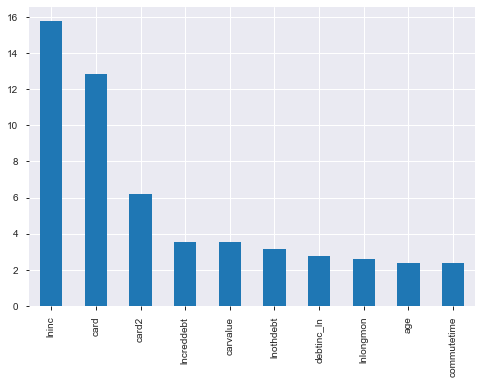

In [74]:
ce=pd.DataFrame(clf_rf.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
ce.sort_values('Coefficients',ascending=False,inplace=True)
ce['Coefficients']=((ce['Coefficients'])*100).round(2)
ce=ce.head(10)
ce.to_excel(writer,'Variable_imp',index=True)
ce=ce.head(12)
ce.Coefficients.plot(kind='bar')